<a href="https://colab.research.google.com/github/Wu931129/NTU---Fundamentals-of-Experimental-Physics-/blob/main/B3%E4%BA%A4%E6%B5%81%E7%A3%81%E5%8C%96%E7%8E%87%E7%AC%AC%E5%9B%9B%E9%83%A8%E4%BB%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

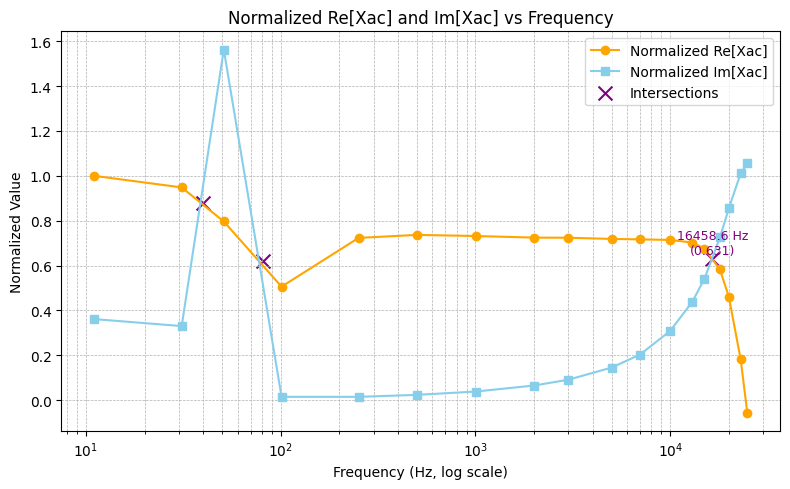

=== 所有交點 ===
交點頻率 = 39.927 Hz, 對應值 = 0.880497
交點頻率 = 81.475 Hz, 對應值 = 0.619135
交點頻率 = 16458.596 Hz, 對應值 = 0.630517


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data ---
frequency = np.array([11, 31, 51, 101, 251, 501, 1001, 2001, 3001, 5001, 7001, 10001, 13001, 15001, 18001, 20001, 23001, 24901], dtype=float)
Re_Xac = np.array([208.1211, 197.3773, 165.7283, 105.2316, 150.4918, 153.2835, 152.2518, 150.7624, 150.6459,
                   149.5619, 149.1192, 148.6344, 146.1542, 140.6550, 121.2439, 95.9724, 37.9851, -12.0099], dtype=float)
Im_Xac = np.array([75.12129, 68.64025, 325.3972, 2.937002, 2.931437, 4.785193, 7.862913, 13.45531, 18.85839,
                   30.10063, 42.19017, 64.13222, 91.25998, 112.6468, 150.8817, 177.8793, 210.3764, 219.6893], dtype=float)

# --- 歸一化（以最大 Re 值 208.1211 為基準）---
Re_norm = Re_Xac / 208.1211
Im_norm = Im_Xac / 208.1211

# --- 計算 Re 與 Im 的差（歸一化後） ---
diff = Re_norm - Im_norm
sign_changes = np.where(np.sign(diff[:-1]) * np.sign(diff[1:]) <= 0)[0]

intersection_freqs = []
intersection_vals = []

for idx in sign_changes:
    f1, f2 = frequency[idx], frequency[idx+1]
    d1, d2 = diff[idx], diff[idx+1]
    # 線性內插法找交點
    f_cross = f1 - d1 * (f2 - f1) / (d2 - d1)
    v_cross = np.interp(f_cross, frequency, Re_norm)
    intersection_freqs.append(f_cross)
    intersection_vals.append(v_cross)

# --- 繪圖 ---
plt.figure(figsize=(8,5))
plt.plot(frequency, Re_norm, marker='o', label='Normalized Re[Xac]', color='orange')
plt.plot(frequency, Im_norm, marker='s', label='Normalized Im[Xac]', color='skyblue')

# 標示交點
plt.scatter(intersection_freqs, intersection_vals, color='purple', marker='x', s=100, label='Intersections')
for f, v in zip(intersection_freqs, intersection_vals):
    if f >= 100:
        plt.text(f, v + 0.02, f'{f:.1f} Hz\n({v:.3f})', color='purple', fontsize=9, ha='center')

# --- 設定 log scale 橫軸 ---
plt.xscale('log')
plt.xlabel('Frequency (Hz, log scale)')
plt.ylabel('Normalized Value')
plt.title('Normalized Re[Xac] and Im[Xac] vs Frequency')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# --- 印出所有交點 ---
print("=== 所有交點 ===")
for f, v in zip(intersection_freqs, intersection_vals):
    print(f"交點頻率 = {f:.3f} Hz, 對應值 = {v:.6f}")



